# CSC311 Lab 1: Nearest Neighbours

In this lab , we apply the $k$-Nearest Neighbour algorithm to classify
hand-written digits. We will use the famous MNIST dataset to build our model.
By the end of this lab, you will be able to:

1. Write vectorized code using `numpy` to vectorize computation.
2. Explain how images can be represented as a vector.
3. Implement the k-Nearest Neighbour algorithm.
4. Choose hyperparameters using a validation set.
5. Explain the effects of varying $k$ in a $k$-Nearest Neighbour model.
5. Report model accuracy using a test set.

Please work in groups of 1-2 during the labs.

Acknowledgements:

- We use a subset of the MNIST data set [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)
  However, to demonstrate realistic data flow, we will start from raw MNIST images,
  rather than the pre-processed data set linked.

## Submission

If you are working with a partner, start by creating a group on Markus.
If you are working alone,
click "Working Alone".

Submit the ipynb file `lab01.ipynb` on Markus
**containing all your solutions to the Graded Task**s.
Your notebook file must contain your code **and outputs** where applicable,
including printed lines and images.
Your TA will not run your code for the purpose of grading.

For this lab, you should submit the following:

- Part 2. Your implementation of `dist_all`, along with the outputs of your tests (3 points)
- Part 2. Your implementation of `predict_knn` (3 points)
- Part 3. Your implementation of `compute_accuracy` (1 point)
- Part 4. Your validation accuracy plot (1 point)
- Part 4. Your explanation of the shape of this plot (1 point)
- Part 5. Your validation accuracy plot (1 point)

## Google Colab Setup

We will use Google Colab to open IPython Notebook (ipynb) file.
This tool allows us to write and execute Python code through our browser, without any environmental setup.

Here are the steps to open ipynb file on Google Colab.

1. Download `lab01.ipynb`, available from the Quercus course website.
2. Click on the following link to open Google Colab: https://colab.research.google.com/
3. Click "Upload", then choose the file which has been downloaded in step 1.

And that's it! Now we can start writing the codes, creating the new code or text cell, etc.

Here are some basic functionalities and features that you might find useful.

1. Running a cell \
    Click the run button on the left side of the code cell (looks like a “play” button with a triangle in a circle) \
    or \
    press SHIFT + ENTER.

2. Installing libraries using Bash Commands \
    Although most of the commonly used libraries (e.g. NumPy, Pandas, Matplotlib) are pre-installed,
    we may occasionally ask you to install new libraries or run other bash commands.
    Bash commands can be run by prefixing instructions in a code cell with '!' in Google Colab (One exception: 'cd' command can be run by prefixing with '%'), e.g. `!pip install [package name]`

3. Mounting Google Drive \
    You may optionally mount Google Drive.
    Click the files button on the left pane, then click on 'mount drive' button (looks like a file icon with a google drive logo). \
    or \
    Run the following code snippet:
    ```
    from google.colab import drive
    drive.mount('/content/drive')
    ```
    By mounting the drive, we can use any files or folders in our drive by using the path as follows:
    ```
    /content/drive/MyDrive/[folder name]
    ```
    For example, we can read the csv file uploaded in the drive using Pandas library as follows:
    ```
    pd.read_csv('/content/drive/MyDrive/myfolder/myfile.csv')
    ```

## Part 1. Data and Numpy

**Task:** We will use a subset of MNIST image files, available here: [https://www.cs.toronto.edu/~lczhang/311/lab01/data.zip](https://www.cs.toronto.edu/~lczhang/311/lab01/data.zip)
Start by downloading and unzipping this dataset on your own machine,
so that you can understand the directory structure.
How many folders are in the zip file? How many image files are in each folder?
How is each image labeled?

In [3]:
# TODO
# There are 10 folders in total with 501 image files each. Each image is labelled by integers between 1 to 60000.

We will also need to download the data to Google Colab's working directory.
Fortunately, Google Colab allows users to run certain bash commands.
Bash commands need have a `!` at the beginning.
We will run these two lines of code to download and unzip our data.

In [ ]:
# Download the lab data files.
!wget https://www.cs.toronto.edu/~lczhang/311/lab01/data.zip

# Unzip the zip file.
!unzip data.zip

Now that the data has been downloaded to the root directory that Colab has access to,
we can begin reading the files in Python.
We will use Python's `PIL` and `matplotlib` libraries to read and
display these MNIST hand-written digit images.

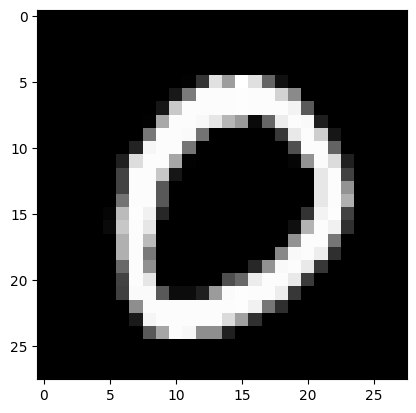

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("mnist-subset/0/16585.png")
plt.imshow(img, cmap="gray") # display image as a greyscale

With any machine learning problem, it is important to build
an intuitive understanding of what our data looks like.

**Task:**
Display several more images, each of a different digit, by
modifying `filename` below.
This is so that you build an intuitive understanding of the
variations between different digits and different images.
Your TA will check that the `filename` variable has been modified.

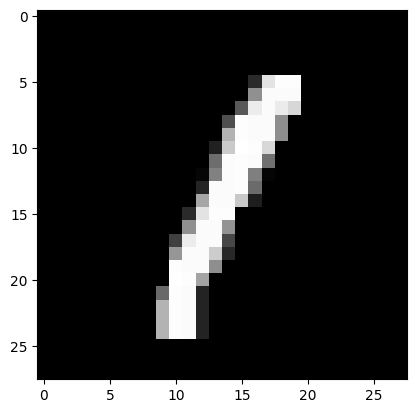

In [6]:
filename = "mnist-subset/1/77.png" # modify me!
plt.imshow(Image.open(filename), cmap="gray")

As we mentioned during lecture, we will represent each input as a
vector of features. In this case, we will need to turn each image
into a vector of features. The features we use will be the pixel
intensities at each of the 784 pixel locations of the image.

The piece of code below uses the Python linear algebra library called
`numpy` to represent each image as numpy array.

In [7]:
import numpy as np

img = Image.open("mnist-subset/0/16585.png")
pixels = np.array(img)

# Display the *shape* of this numpy array
print(pixels.shape)

(28, 28)


Here, `pixels` is a 2D numpy array containing the pixel intensities
of one image. The elements of `pixels` can be *indexed*.
For examples `pixels[0, 0]` indexes the first row and column.
Additionally, similar to python lists, numpy arrays support *slicing*:
e.g. `pixels[1:3, 0]` and `pixels[200:, :]`.

**Task:** Print the entire top row of pixels of the image.

In [8]:
# TODO
print(pixels[0, :])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


As mentioned in lecture 1, we would like to represent this image as a
*vector*. To do so, we can use the `reshape` method to change the shape
of this matrix to a 1D vector:

In [9]:
pixels = pixels.reshape(784)
# alternatively
# pixels = pixels.reshape(-1) # infer the shape of the single dimension

One thing that trips up a lot of students is that numpy does *not* distinguish
between row and column vectors. Here, `pixels` is simply a vector.

We will show more `numpy` functionalities as we need them. If you prefer to first
go through a `numpy` tutorial before proceeding, we recommend this one:
[https://cs231n.github.io/python-numpy-tutorial/](https://cs231n.github.io/python-numpy-tutorial/)

**If the pace in which we are introducing numpy is too fast for you, consider
taking CSC338 concurrently, or before attempting CSC311.**

Now that we know how to read an image into a vector, we can read in
the entire set of images.

In [10]:
import glob # for interacting with the file system

def img_to_vec(img):
    """Return a vector representation of an MNIST image file"""
    img = Image.open(img)
    return np.array(img).reshape(-1)

# D will house our data
D = []

# Iterate over all files that match the pattern "mnist-subset/*/*.png"
# and add its information to `D`. We will sort the filenames so that we get
# a consistent set of files in the training, validation, and test sets.
for file in sorted(glob.glob("mnist-subset/*/*.png")):
    x = img_to_vec(file)   # vector input
    t = file.split("/")[1] # find out the target label by reading the file path
    D.append((x, t),) # add this to the data set

This representation of the labelled data `D` as a list of tuples of `(features, labels)`
is not efficient (does not allow for parallelization).
We will change the representation shortly.
For now, let's first separate the data into training, validation, and test sets.

(In the code below, why do you think we need to shuffle `D`? Can you think of other approaches to splitting the training/validation/test data?)

In [150]:
# If you re-run this cell without the also re-running the previous
# cell block, then your train/validation/test splits will differ from
# everyone else's

import random
random.seed(5)         # set the random seed.
random.shuffle(D)
D_train = D[:4000]     # the training set
D_valid = D[4000:4500] # the validation set
D_test  = D[4500:]     # the test set

To take full advantage of `numpy`, we will express our computations as matrix operations as
much as we can. For our nearest-neighbour model, this means that we would like to express distance
computations using matrix operations as much as we can. We will thus store our training data
in a **matrix**, and our target values in a **vector**.

In other words, the following code takes the training data `D_train`, and produces:

1. a **data matrix** `X_train`, stored as a numpy array of shape `[4000, 784]`. In this data matrix, each row `X_train[i, :]` represents a single **image** in the training data.
2. a **target vector** `t_train`, stored as a numpy array of shape `[4000]`.  In this vector, each `t[i]` contains the target for image $i$ in the training data.

Please take a look at the documentation for `np.stack` to see how the first line of code works [https://numpy.org/doc/stable/reference/generated/numpy.stack.html](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)

In [151]:
# construct X_train by first producing a list of vectors
# here, each element x_vectors[i] is a vector representation of an image
x_vectors = [x for (x, t) in D_train]
X_train = np.stack(x_vectors)

# construct t_train by first producing a list of targets
targets = [t for (x, t) in D_train]
t_train = np.array(targets)

**Task** Produce the corresponding data matrix and target vectors `X_valid`, `t_valid`,
`X_test`, `t_test`.

In [152]:
X_valid = np.stack([x for (x, t) in D_valid])
t_valid = np.array([t for (x, t) in D_valid])
X_test = np.stack([x for (x, t) in D_test])
t_test = np.array([t for (x, t) in D_test])

## Part 2. Distance Computation

In order to use the nearest neighbour model to predict MNIST digit labels, we need
to be able to compute *Euclidean distances* between images represented as vectors
(specifically, `numpy` arrays of shape `(784,)`).
In this section, we will focus on this distance computation.
Euclidean distance computation should be straightforward for most students familiar
with Python; the challenge is to write **vectorized** code in `numpy` that will allow
us to parallelize many distance computations all at once.

**Task:** Start by writing a function that computes the squared Euclidean distance
between two images, both represented as `numpy` arrays of shape `(784,)`. That is, compute for vectors ${\bf v}$ and ${\bf x}$:

$$\textrm{dist}({\bf v}, {\bf x}) = \sum_{j=1}^{D} (v_j - x_j)^2$$

Notice that we will use squared Euclidean distance as our distance measure, rather
than the Euclidean distance itself. (Why is this okay?)

**Do not use any loops.**

In [14]:
def dist_single(v, x):
    """
    Compute the squared Euclidean distance between vectors `v` and `x`.

    Parameters:
        `v` - a numpy array (vector) representing an MNIST image, shape (784,)
        `x` - a numpy array (vector) representing an MNIST image, shape (784,)

    Returns: a scalar value representing their squared Euclidean distance
    """
    diff = x - v # compute a difference vector  (x-v)
    sqdiff = diff ** 2 # TODO: compute element-wise **square** of each element in `diff`
                  # In numpy, operations like `diff + 2`, `diff - 2`, and `diff ** 3`
                  # are all computed element-wise.
    sumval = sum(sqdiff) # TODO: compute the sum of the elements of `sqdiff`.
                  # You may find one of the functions from this list useful:
                  # https://numpy.org/doc/stable/reference/routines.math.html
    return sumval

Since we did not write any loops, each step of the computation (e.g. `x - v`) can be done
in parallel (e.g. `x[1] - v[1]` can be computed in parallel with `x[2] - v[2]`).

To test the above function, let's try and compute some distances to see if the result
is what we expect.

**Task**: Run and add to these tests. Add at least 3 new tests. You will likely want to write
more tests to test your code more systematically.

In [15]:
# construct an image (vector) that is all black
black = np.zeros(784)

# construct an image (vector) that is all white
white = np.ones(784)

# construct an image (vector) that is all black except a single white pixel
dot = np.zeros(784)
dot[100] = 1

print("This should be 0:", dist_single(black, black))
print("This should be 0:", dist_single(dot, dot))
print("This should be 0:", dist_single(white, white))
print("This should be 1:", dist_single(black, dot))
print("This should be 784:", dist_single(black, white))

This should be 0: 0.0
This should be 0: 0.0
This should be 0: 0.0
This should be 1: 1.0
This should be 784: 784.0


To continue, we will parallelize distance computations further,
by writing a new function
that computes the distance between a single image vector `v` and
all the images in a data matrix `X`. Eventually, we will use this function
to find the closest images to a new image `v` in the training set `X_train`.

**Graded Task:** Write a function that takes a vector `v` (representing an MNIST image),
and computes the squared Euclidean distance between `v` and every data point in
the training set `X_train`.  **Do not use any loops.**

In [153]:
def dist_all(v, X):
    """
    Compute the squared Euclidean distance between an image `v` (vector) and the
    images in the data matrix `X`.

    Parameters:
        `v` - a numpy array (vector) representing an MNIST image, shape (784,)
        `X` - a data matrix representing a set of MNIST image, shape (N, 784)

    Returns: a vector of squared Euclidean distances between `v` and each image in `X`,
             shape (N,)
    """

    diff = X - v # compute difference vectors (x-v), stored in a matrix
                 # to do so, we use an idea in numpy called broadcasting
                 # https://numpy.org/doc/stable/user/basics.broadcasting.html
    # Here, diff has a shape of (N, 784), and each diff[i, :] is a vector
    # equivalent to (X[i, :] - v)

    sqdiff = np.square(diff) # TODO: compute element-wise **square** of each element in `diff`
                  # In numpy, operations like `diff + 2`, `diff - 2`, and `diff ** 3`
                  # are all computed element-wise.
                  # Hint: Does does approach you used in `dist_single` still work?

    sumval = np.sum(sqdiff, axis = 1) # TODO: compute the sum of the elements of `sqdiff` along each row
                  # Hint: What additional parameter do you need to add to the approach
                  # you used in `dist_single`? (Assuming you used np.sum)
    return sumval

As before, let's try and compute some distances to see if it makes sense.
Please included the output of these tests in your submission.

In [154]:
# construct an image (vector) that is all black
black = np.zeros(784)

# construct an image (vector) that is all white
white = np.ones(784)

# construct an image (vector) that is all black except a single white pixel
dot = np.zeros(784)
dot[100] = 1

# combine all three images into a data matrix
X = np.stack([black, dot, white])

print(dist_all(dot, X)) # Is this what you expect?

[  1.   0. 783.]


In [155]:
# TODO: Write more tests to convince yourself that your code works!
print("This should be 0, 1, 784:", dist_all(black, X))
print("This should be 784, 783, 0:", dist_all(white, X))


This should be 0, 1, 784: [  0.   1. 784.]
This should be 784, 783, 0: [784. 783.   0.]


## Part 3. Nearest Neighbour

Now that we know how to compute distances, we have almost everything we need
to be able to implement the k-Nearest Neighbour algorithm. Our goal in this
part is to be able to make a prediction (labels 0, 1, ... 10) given an image
$v$ represented as a vector. To make such a prediction, we will need to
follow three steps:

1. Compute the distance between `v` to every image in our training set. We already
   have a helper function `dist_all` that does this for us.
2. Given the vector of distances returned by `dist_all`, find the indices of the `k`
   closets images in `X` to `v`.
3. Given these `k` indices, find the most common label amongst these `k` images.
   If there is a tie, choose any of the most common labels.

**Graded Task**: Let's write the function `predict_knn()` that makes such predictions.
We recommend that you follow these above three steps, but if you prefer a different
approach, that's fine too as long as it works and is fast.

(This portion of the lab should be programming that only uses concepts
taught in courses like CSC148. It is normal to have to think a bit to be able
to write this code. However, if you find this type of coding extremely challenging,
you will likely benefit from further computer science preparation before taking CSC311.
Consider taking any course that requires you to practice writing code to solve problems
and come back to CSC311 in a future year.)

In [136]:
def predict_knn(v, X_train=X_train, t_train=t_train, k=1):
    """
    Returns a prediction using the k-NN

    Parameters:
        `v` - a numpy array (vector) representing an MNIST image, shape (784,)
        `X_train` - a data matrix representing a set of MNIST image, shape (N, 784)
        `t_train` - a vector of ground-truth labels, shape (N,)
        `k` - a positive integer 1 < k <= N, describing the number of closest images
              to consider as part of the knn algorithm

    Returns:
        A single number `i` between 0 and 9, representing the digit
    """
    # Step 1. compute the distances between v and every element of X
    dists = dist_all(v, X_train)

    # Step 2. find the indices of the k-nearest neighbours

    # Hint: You may wish to sort the distances in `dists`. But how should you
    # do this sorting while keeping track of the indices? You may find
    # the functions "enumerate" (or "zip"), and "sorted" helpful.
    # Alternatively, you may choose to use a function like "np.argsort"
    indices = np.argsort(dists)[:k]

    # Step 3. find the most common target label amongst these indices

    ts = t_train[indices] # get the target labels for these indices
    # NOTE: the above code uses numpy's ability to take a *list of indices*
    # For example, t_train[np.array([1, 10, 4])] will produce a numpy array
    # with the elements: t_train[1], t_train[10], t_train[4]

    # What else do you need to do to produce the prediction?

    prediction = np.argmax(np.bincount(ts.astype(int)))


    return prediction

**Task**: Use the function `predict_knn()` to compute the prediction
for `X_valid[5]`, displayed below. Choose a value of `k` of your choice.
Is the prediction correct?
You are also welcome to change the value of `idx` to explore how
the prediction changes for different images in our validation set.

Ground truth: 5
Prediction: 5


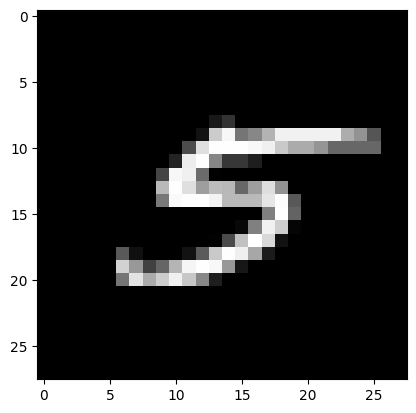

In [166]:
idx = 3

plt.imshow(X_valid[idx].reshape(28, 28), cmap="gray") # visualize this image

prediction = predict_knn(X_valid[idx], k=1)

print("Ground truth:", t_valid[idx])
print("Prediction:", prediction)

**Graded Task**: We would like to summarize how a k-NN model performs on a data set.
Complete the function `compute_accuracy()`, which computes the accuracy of
the k-NN model across a data set.

In theory, we could attempt to vectorize this computation. However, the sorting
operation in `predict_knn` is challenging to parallelize.
For simplicity, let's use a loop to iterate over `X_new` and `t_new`

In [175]:
def compute_accuracy(X_new, t_new, X_train=X_train, t_train=t_train, k=1):
    """
    Returns the accuracy (proportion of correct predictions) on the data set
    `X_new` and ground truth `t_new`.

    Parameters:
        `X_new` - a data matrix representing MNIST images that we would like to
                  make predictions for, shape (N', 784)
        `t_new` - a data matrix representing ground truth labels for images in X_new,
                  shape (N',)
        `X_train` - a data matrix representing a set of MNIST image in the training set,
                    shape (N, 784)
        `t_train` - a vector of ground-truth labels for images in X_train,
                    shape (N,)
        `k` - a positive integer 1 < k <= N, describing the number of closest images
              to consider as part of the knn algorithm

    Returns: the proportion of correct predictions (between 0 and 1)
    """

    num_predictions = 0
    num_correct = 0

    for i in range(X_new.shape[0]): # iterate over each image index in X_new
        v = X_new[i] # image vector
        t = t_new[i] # prediction target

        y = predict_knn(v, X_train, t_train, k) # TODO

        if y == int(t):
            num_correct += 1 # TODO: change this!

        num_predictions += 1

    return num_correct / num_predictions

Let's estimate the training accuracy for $k=1$.
To make the computation faster, we will use a subset of the training data.
The training accuracy should be either equal to or close to 100%.
(Why?)

In [176]:
compute_accuracy(X_train[:500], t_train[:500], X_train=X_train, t_train=t_train, k=1)

1.0

## Part 4. Hyperparameter Tuning

In this section, we will fine-tune the hyperparameter parameter $k$ for our data set.
To do so, we will need to compute the validation accuracy across our data set for different choices of $k$.

**Graded Task:** Compute the validation accuracy for every value of $k$ between 1 and 10, inclusive.
Store these values in an array called `valid_acc`, so that `valid_acc[k-1]` stores the validation
accuracy for this choice of $k$.

(You may optionally find a faster way to compute the validation accuracies by avoiding
repeated distance computations.)

Since this code will not be run repeatedly, this code is much less important to optimize compared
to functions like `dist_all`.

In [178]:
valid_acc = []

for k in range(1, 11):
    num_correct = 0
    num_predictions = 0

    for i in range(X_valid.shape[0]):
        v = X_valid[i]
        t = t_valid[i]
        prediction = predict_knn(v, X_train, t_train, k)

        if prediction == int(t):
            num_correct += 1

        num_predictions += 1
    acc = num_correct / num_predictions # TODO
    valid_acc.append(acc)

In [179]:
valid_acc

[0.216, 0.216, 0.21, 0.234, 0.248, 0.262, 0.262, 0.26, 0.256, 0.256]

If your code above is correct, you should obtain a validation accuracy of approximately ~20-30%. This is
better than random, but we will be able to do better.

Text(0, 0.5, 'Accuracy')

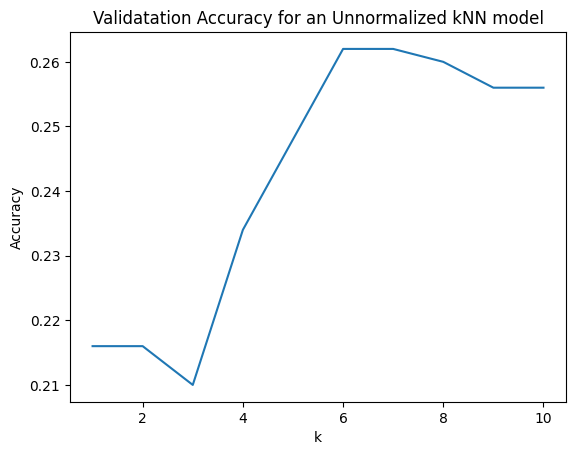

In [180]:
plt.title("Validatation Accuracy for an Unnormalized kNN model")
plt.plot(range(1, 11), valid_acc)
plt.xlabel("k")
plt.ylabel("Accuracy")

**Task** What is the optimal value of $k$ we should choose? Recall that we should make this choice using
 the validation accuracy.

In [191]:
max_value = max(valid_acc)
max_index = valid_acc.index(max_value)
k = max_index + 1
k

6

**Graded Task** Explain the shape of the above plot. Why does validation accuracy increase at first, and then decrease?
Recall that we used words like "overfitting" and "underfitting" during lecture.

In [26]:
# With small k, the algorithm considers very few neighbors when making predictions. This leads to a model that can capture intricate details in the training data.
#The model has low bias but high variance. It can fit the training data closely, but it may not generalize well to unseen data. (Overfitting)

#As k increases, the model becomes less sensitive to noise in individual data points. It starts capturing more general patterns in the data.
#There's a balance between bias and variance, resulting in optimal generalization to unseen data. This often leads to the highest validation accuracy.

#As k becomes very large, the model relies on a larger number of neighbors. It tends to average out the effects of individual data points, resulting in a simpler and smoother decision boundary.
#The model has higher bias but lower variance. It becomes less flexible and may miss some patterns present in the data, leading to decreased accuracy on both the training and validation sets. (Underfitting)



## Part 5. Normalizing the data

In this part, we will show why it is important to **normalize our data** when using a nearest neighbour model.
In particular, we will normalize each feature (each pixel, or each of the 784 coordinates in `X_train`)
so that it has 0 mean and standard deviation 1.
In other words, we will normalize (standardize) the data matrix `X_train` so that each of its *columns*
has a mean 0 and standard deviation 1.

Let's start by computing the means and standard deviations of each pixel (each column of the data matrix).
We will use the training set to compute these values.
(Why do you think it would be a bad idea to instead use all the available data that we have, including the test set?)

In [193]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
print(X_mean.shape)
print(X_std.shape)

(784,)
(784,)


Now, we can transform the input data by subtracting the mean and dividing by the standard deviation
in the training set. We again use broadcasting ([https://numpy.org/doc/stable/user/basics.broadcasting.html](https://numpy.org/doc/stable/user/basics.broadcasting.html)
to parallelize our computation. `X_train` has shape `(N, D)` and `X_mean` has shape `(D,)`,
and so `X_train - X_mean` will have shape `(N, D)` with each row of its result corresponding
to the value of `X_train[row, :] - X_mean`. The division operation is broadcasted similarly.
Additionally, we add a positive value to the denominator in case some of the standard deviation
values are exactly 0, to avoid divisions by 0.

In [194]:
epsilon = 0.0001
X_train_norm = (X_train - X_mean) / (X_std + epsilon)

**Task:** Apply the same transformation as above to data in the validation and test sets (i.e., subtract `X_mean` and divide by `X_std`).
Note that we should *not* recompute means and standard deviations. Why do you think that is?

In [195]:
X_valid_norm = (X_valid - X_mean) / (X_std + epsilon)
X_test_norm = (X_test - X_mean) / (X_std + epsilon)

**Graded Task:** Now, using this normalized data let's compute the validation accuracies for values of $k$ between 1 and 10:

In [200]:
valid_acc_norm = []

for k in range(1, 11):
    num_correct = 0
    num_predictions = 0

    for i in range(X_valid_norm.shape[0]):
        v = X_valid_norm[i]
        t = t_valid[i]
        prediction = predict_knn(v, X_train_norm, t_train, k)

        if prediction == int(t):
            num_correct += 1

        num_predictions += 1
    acc = num_correct / num_predictions # TODO
    valid_acc_norm.append(acc)

In [201]:
valid_acc_norm

[0.878, 0.864, 0.874, 0.882, 0.878, 0.878, 0.874, 0.866, 0.862, 0.86]

If your code above is correct, you should obtain a much higher validation accuracy!

Text(0, 0.5, 'Accuracy')

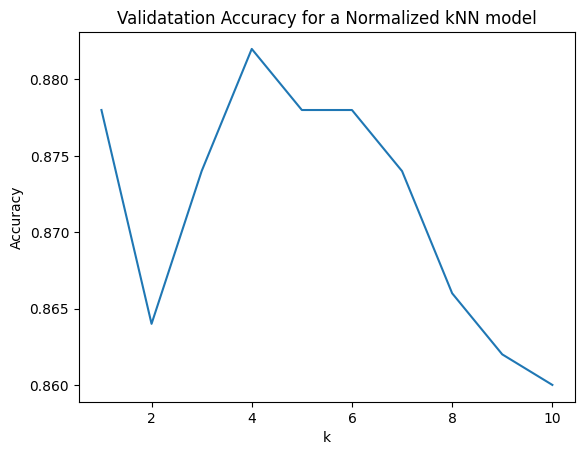

In [202]:
plt.title("Validatation Accuracy for a Normalized kNN model")
plt.plot(range(1, 11), valid_acc_norm)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [203]:
max_value = max(valid_acc)
max_index = valid_acc_norm.index(max_value)
k = max_index + 1
k

4

## Part 6. Reporting Test Accuracy

Following machine learning best practices, we use the test set exactly once see how our model
might perform on new data that it has never seen before.

**Task**: Report the test accuracy for best model that we have so far.
(What does "best" mean in this case?)

In [209]:
# "Best" when highest accuracy in the training data set. We'll use k = 4.


def compute_accuracy_test(X_new, t_new, X_test_norm=X_test_norm, t_test=t_test, k=4):

    num_predictions = 0
    num_correct = 0

    for i in range(X_new.shape[0]): # iterate over each image index in X_new
        v = X_new[i] # image vector
        t = t_new[i] # prediction target

        y = predict_knn(v, X_test_norm, t_test, k) # TODO

        if y == int(t):
            num_correct += 1 # TODO: change this!

        num_predictions += 1

    return num_correct / num_predictions

In [210]:
compute_accuracy_test(X_test_norm, t_test)

0.872